# Simulating the Nagel-Schreckenberg model

This notebook is intended to help you to programme the Nagel-Schreckenberg (NS) model in python. 

This tutorial will assume that you have the **anaconda distribution** (freely available here: https://www.continuum.io/downloads) of python installed, which includes instructions on how to download and install anaconda.

This is a **Jupyter** (or ipython) notebook. It consists of cells, such as this, in which you can write text or computer code. This cell is written in **Markdown**, which allows you to format your text and use simple latex commands. (For some basic Markdown commands read: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

To edit the text in a cell, double click on it. Once you're finished editing and want to run the code, press `shift+enter`

There is good **documentation** for python at https://www.python.org, but I find it easiest to google the things I'm looking for (e.g. function syntax, which means the arguments that a function takes).

## Disclaimer
This work sheet is intended as a guide for developing a program that simulates the Nagel-Schreckenberg model. The way that it suggests is not the only way to implement the model. If you find another method is more intuitive or runs quicker then feel free to use it!

This worksheet should contain all the information you need in order to create a working version of the Nagel-Schreckenberg (NS) model, although the precise way in which you implement it may differ to what I think you'll end up with, so it's not completely guaranteed everything you need is here. In which case Google it!.

## How to use this worksheet
This worksheet will introduce you to the basics of python and provide you with relevant examples.


<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model</b>
<br><br>
This worksheet also includes highlighted text like this that connects the examples to your NS program.  
<br>
</section>

## Tip
It's normally helpful to have two notebooks open when coding, one where you test out commands/scraps of code, and the other where you write your program. I would encourage you to open **two** new notebooks, one to test out the examples in this worksheet and one for your NS code.
## Tip
If you write a piece of code and then later decide to change it, create a new cell, copy and paste your old code into the new cell (you can do this using the copy and paste icons above or you can create new cells using the insert tab above) and then edit that. If you delete things that you then later want, it can be a pain to get them back.
## Tip
You can block comment bits of code by highlighting them and the pressing `ctrl+/` (i.e. contral and forward slash).

# 1 Basics

You can use cells as calculators, for example

In [1]:
1+2

3

but often we will want to store numbers as **variables**, which we do like so 

In [2]:
x=1

We can then use these variables in calculations, e.g.

In [3]:
x+2 # This is a comment and won't show up in the output. 
# Use comments to explain what your code is doing

3

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model - Parameters</b>
<br><br>
At the start of our program we need to specify the value of the various parameters that our program will need. For example, we need to know what the length $L$ of our road is. This is the same as the number of sites on our road, so this needs to be an integer. You might write  
<br>
</section>

In [4]:
L=10 # Start off small!

<section style="color:#806000; background-color:#ffffdd">
<br>
You also need to define
<ul>
<li> the numebr of cars on the road $N$
<li> the number of timesteps $T$
<li> the maximum velocity $v_{\rm max}$
<li> the randomisation parameter $p$
</ul>
<br>
Which of these are integers and which are not? What range should p take? How do you calculate the density of cars? (Tip: use $N$ and $L$).
<br><br>
</section>

## 1.1 Arrays
###1.1.1 Creating arrays

There is a python package called **NumPy** (http://www.numpy.org) that was written to make scientific programming easier and has lots of built in functions to do sophisticated things with matrices. If you installed the Anaconda distribution of python then you will have it already. We will use the NumPy package in this worksheet and to do so you need to type

In [5]:
import numpy as np

Every time we want to use one of the functions in the NumPy package, we have to write `np.` and then the name of the function.

We will make use of NumPy **arrays**, which allow us to store vectors and matrices and manipulate them in various ways. To creat a numpy array, you can define each element, for example like this

In [6]:
w=np.array([10,2,300])
w

array([ 10,   2, 300])

There are also built in ways to generate arrays, for example

In [7]:
x=np.zeros((3,1))
y=np.linspace(0,2,3)
z=np.random.rand(3,4)
# If we want to see what's in both x and y, we can use the print command:
print('Variable x is ')
print(x)
print('Variable y is ')
print(y)
print('Variable z is ')
print(z)

Variable x is 
[[ 0.]
 [ 0.]
 [ 0.]]
Variable y is 
[ 0.  1.  2.]
Variable z is 
[[ 0.45067897  0.24602781  0.31476529  0.12332214]
 [ 0.45194991  0.10590406  0.09206862  0.01539276]
 [ 0.9562192   0.43643093  0.10287983  0.25832011]]


We may want to check how big an array is

In [8]:
print(x.shape)
print(y.shape)
print(z.shape)

(3, 1)
(3,)
(3, 4)


Notice the difference in shape between these variables.

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model - Initial conditions part 1</b>
<br><br>
The approach here will be to develop a **site oriented** simulation, meaning that we have an array whose elements correspond to the sites on the road. To indicate that a site is occupied by a vehicle, you could set the value of the site to the current velocity of the vehicle, i.e. a non-negative integer. You could indicate that a site is empty by setting it to -1.
<br><br>
The program will also model a **ring-road**, so cars moving off one end of the road will appear back at the start. 
<br><br>
You will need to specify initial conditions of the road at the beginning of the simulation. To start, create an array with $L$ elements all with values -1 to indicate an empty road. We will add cars later.
<br><br>
</section>

### 1.1.2 Slicing arrays

You can access elements of arrays in various ways and what you get will depend on the size of the array. For example

In [9]:
print(y)
print(y[0])
print(y[1])
print(y[2])

[ 0.  1.  2.]
0.0
1.0
2.0


Notice that the indices for python arrays start at zero. We can also use negative indicies (!)

In [10]:
print(y[-1])
print(y[-2])

2.0
1.0


So an easy way to access the last value in an array is to look at the element `[-1]`.

You can access elements of a multi-dimensional array in the same way, but look at what you get when you do

In [11]:
z[0]

array([ 0.45067897,  0.24602781,  0.31476529,  0.12332214])

If we just wanted the value of a single element, we would have to do

In [12]:
z[0,0]

0.45067896596878954

(Python can also handle arrays with more dimensions, but we won't get into that here.)

We might also want to access several elements, which we can do using slicing. Remember that

In [13]:
z

array([[ 0.45067897,  0.24602781,  0.31476529,  0.12332214],
       [ 0.45194991,  0.10590406,  0.09206862,  0.01539276],
       [ 0.9562192 ,  0.43643093,  0.10287983,  0.25832011]])

So to get the first 2 elements in the first column, we would write

In [14]:
z[0:2,0]

array([ 0.45067897,  0.45194991])

(Notice that you have to write `0:2` to get just elements 0 and 1.)

Similarly, to get the first 2 elements in the first row, we would write

In [15]:
z[0,0:2]

array([ 0.45067897,  0.24602781])

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model - Initial conditions part 2</b>
<br><br>
We now need to add cars to our empty road. I will a way to do this so that the cars are positioned randomly with zero velocity. However, there are lots of other initial conditions you could specify and you should come up with some yourself and test them out.
<br><br>
Use slicing to set the first $N$ elements of the road to be 0. To position them randomly you need to shuffle the vector. There is a package called `random` with a function called `shuffle` that does this
<br><br>
</section>

In [16]:
import random as rd

<section style="color:#806000; background-color:#ffffdd">
<br>
The shuffle function can be called as follows
<br><br>
</section>

In [17]:
x=np.linspace(-2,3,6) # First we define an array
print(x) # The elements in the array are the numbers 0 to 5
rd.shuffle(x)
print(x) # Now x has been shuffled

[-2. -1.  0.  1.  2.  3.]
[ 2.  1. -1.  0. -2.  3.]


<section style="color:#806000; background-color:#ffffdd">
<br>
Adapt the code above to shuffle your road and check that it does the right thing!
<br><br>
</section>

### 1.1.3 Logical operations

We might also want to access those elements that satisfy a certain condition. We can apply logical operations to arrays

In [18]:
y==2

array([False, False,  True], dtype=bool)

In [19]:
z>=0.5

array([[False, False, False, False],
       [False, False, False, False],
       [ True, False, False, False]], dtype=bool)

An intuitive way to combine multiple logical operations would be

In [20]:
z>0.5 & z<0.75
# but it doesn't work! (Why?) Below is the kind of thing you might see in a python 
# error message. It trys to tell you where the mistake is, but it isn't always
# right and more often than not it's confusing.

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

NumPy has functions that compute *elementwise* logical operations

In [22]:
np.logical_and(z>0.25,z<0.75)

array([[ True, False,  True, False],
       [ True, False, False, False],
       [False,  True, False,  True]], dtype=bool)

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model - Locating vehicles</b>
<br><br>
Because we only need to update cars, we will want to determine where they are in our road array. What logical test could you apply to determine where the cars are? Remember that cars have non-negative velocities and empty lattice sites are indicated by -1.
<br><br>
</section>

### 1.1.4 Logical slices

To access the elements of an array that satisfy the logial operations, we can do

In [23]:
z[z>=0.5]

array([ 0.9562192])

but notice the shape of the resulting array.

If we wanted to change the values of these elements to the same value, we could do

In [24]:
z[z>=0.5]=0
z

array([[ 0.45067897,  0.24602781,  0.31476529,  0.12332214],
       [ 0.45194991,  0.10590406,  0.09206862,  0.01539276],
       [ 0.        ,  0.43643093,  0.10287983,  0.25832011]])

And there is a neat way to increment the values

In [25]:
z[z==0]+=1
z

array([[ 0.45067897,  0.24602781,  0.31476529,  0.12332214],
       [ 0.45194991,  0.10590406,  0.09206862,  0.01539276],
       [ 1.        ,  0.43643093,  0.10287983,  0.25832011]])

We can change multiple entries at once setting a slice equal to an array of the same size

In [26]:
z[:,1]=y
z

array([[ 0.45067897,  0.        ,  0.31476529,  0.12332214],
       [ 0.45194991,  1.        ,  0.09206862,  0.01539276],
       [ 1.        ,  2.        ,  0.10287983,  0.25832011]])

If we want the indices of certain values, we use the NumPy function `nonzero`

In [27]:
ind=np.nonzero(z!=1)
ind

(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 2, 3, 0, 2, 3, 1, 2, 3]))

Notice that there are two arrays, corresponding to the rows and columns in the matrix. We can access these elements by typing

In [28]:
z[ind]

array([ 0.45067897,  0.        ,  0.31476529,  0.12332214,  0.45194991,
        0.09206862,  0.01539276,  2.        ,  0.10287983,  0.25832011])

which is a little neater than what might have been the intuitive way

In [29]:
z[ind[0],ind[1]]

array([ 0.45067897,  0.        ,  0.31476529,  0.12332214,  0.45194991,
        0.09206862,  0.01539276,  2.        ,  0.10287983,  0.25832011])

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model - Positions, velocities and headways</b>
<br><br>
In order to determine the distance between vehicles, we need to know their positions, which correspond to the index of the cell that each vehicle occupies. Use NumPy's `nonzero` function to get the positions of the vehicles on the road.
<br><br>
You can also use the methods we've described above to get the vehicles' velocities. We will use the velocities later to change each vehicles' positions.
<br><br>
To get the distances between vehicles, known as the headways, we need to determine what the position of the vehicle in front is. Because we're modelling a ring-road, the car in front of the vehicle at one end is the vehicle at the other end. You can calculate the position of the vehicle in front using NumPy's `roll` function. Look at what it does
<br><br>
</section>

In [30]:
print(x)
print(np.roll(x,+1))
print(np.roll(x,-1))

[ 2.  1. -1.  0. -2.  3.]
[ 3.  2.  1. -1.  0. -2.]
[ 1. -1.  0. -2.  3.  2.]


<section style="color:#806000; background-color:#ffffdd">
<br>
The headways can be calculated by sutracting the position of each vehicle from the position of the corresponding vehicle in front. However, the headway will be negative for the car with the largest position, since the vehicle in front will have the smallest position. You can correct this using NumPy's `mod` function, 
<br><br>
</section>

In [31]:
print(x) # Note that roll has changed x!
np.mod(x,L)

[ 2.  1. -1.  0. -2.  3.]


array([ 2.,  1.,  9.,  0.,  8.,  3.])

<section style="color:#806000; background-color:#ffffdd">
<br>
which returns the values of the array `x` modulo `L`.
<br><br>
</section>

## 1.2 Loops

Normally we write computer programs to do something lots and lots of times so that we don't have to. You can repeat a set of commands by looping over them. For example, if you want to do something for each element in an array (or a list), then you use a `for` loop

In [32]:
for element in y:
    print(element)
print("This bit of text isn't in the loop")

0.0
1.0
2.0
This bit of text isn't in the loop


Notice that you have to finish the line with the `for` in it with a **colon**. You also have to **indent** the commands that you want to appear in the for loop using the **tab** key. What happens if you indent the second print statement? Why does it happen?

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model - Updating the road</b>
<br><br>
So far we have set up the parameters, initialised the road and found each vehicles' position, headway and velocity. We're now in a position to be able to apply the NS update rules. We want to do this at each time step, so it's natural to use a `for` loop.
<br><br>
However, we want to keep track of the state of the road at each timestep. We could do this by creating an $L$ by $T$ array of unoccupied lattice sites (what value do these take?). Do this using the `np.zeros` function and for the purpose of this worksheet let's call this array `road` (but you can call it whatever you like in your program). If it has $L$ rows and $T$ columns, the the `i`th column corresponds to the state of the road at time `i`. 
<br><br>
Next we should replace column 0 in `road` with the initial condition. Then we'll loop through coloumns $0$ to $T-1$ and using the current column of `road` to determine what the next column of `road` will be. A useful way to do this is to use the `range` function:
<br><br>
</section>

```python
# Remember to define T
for i in range(T-1):
    # This is where your code should go - remember to indent! 
```

<section style="color:#806000; background-color:#ffffdd">
<br>
This will loop through your code, increasing `i` by 1 each time, starting from `i=0` and ending with `i=T-2` (which is a total of `T-1` iterations).
<br><br>
In this loop, I suggest that you define variables for the position $x$, velocity $v$ and headway $h$ of each vehicle from `road[:,i]` and then apply the NS rules:
<ol>
<li><b>Acceleration</b>. Here you should increase all velocities less than $v_{\rm max}$ by one (a neat way to do this was mentioned above). How would you do this using what we've learnt above? 
<li><b>Decceleration</b>. Because vehicle velocities will be used to update positions they should not be larger than $h-1$ (why $h-1$?). So you should update vehicle velocities so that they are the minimum of $v$ and $h-1$. A useful NumPy function for this is `np.minimum`. Have a look at this example to see how it works: 
</ol>
</section>

In [33]:
x=np.round(5*np.random.rand(5))
print('Array x ', x)
y=np.linspace(1,5,5)
print('Array y ', y)
print('Minimum of arrays x and y')
print(np.minimum(x,y))

Array x  [ 5.  4.  4.  1.  0.]
Array y  [ 1.  2.  3.  4.  5.]
Minimum of arrays x and y
[ 1.  2.  3.  1.  0.]


<section style="color:#806000; background-color:#ffffdd">
<ol start="3">
<li><b>Randomisation</b>. For vehicles with $v>0$, you reduce their velocity by 1 with probability $p$. Your velocity array will have $N$ elements. You can create an array of length $N$ of random numbers uniformly distributed between 0 and 1 using the `np.random.rand(N)` function. How can you use this to determine which vehicles should decelerate? You may also need to use the `np.logical_and` function again in order to update the velocities.
<li><b>Update positions</b>. With the velocities updated according to the rules above, the new positions are $\mod(x+v,L)$. You can use these as indices in the `i+1`th column of `road`, which you want to set to you updated velocities. You new positions need to be integers though, which you can do as follows:
</ol>
<br>
</section>

In [34]:
print(x)
print(x.astype(int))
print(x) # Note that this doesn't actually change the values in x to integers

[ 5.  4.  4.  1.  0.]
[5 4 4 1 0]
[ 5.  4.  4.  1.  0.]


<section style="color:#806000; background-color:#ffffdd">
<br>
This completes one loop of the program!
<br><br>
</section>

## 1.3 Functions

Sometimes you'll want to combine some commands together into a function. In python, functions can be defined as follows

In [35]:
def myfunction(startingnumber,numberoftimes):
    ''' myfunction(startingnumber,numberoftimes)
        
        This function computes the logistic map starting from the input variable
        startingnumber (a real number) and iterating numberoftimes (an integer). 
        In this case, the multiplication parameter is set at 3.7 so that 
        the map is chaotic. This text will appear as function help file. It's good 
        practice to 
    '''
    output=np.zeros(numberoftimes+1)
    output[0]=startingnumber
    for i in range(numberoftimes):
        output[i+1]=3.7*output[i]*(1-output[i])        
    return output        

You can call your function whatever you like. The things in brackets are the function arguments, i.e. the things you have to supply when calling the function.

Notice that the first line ends with a colon and the remaining lines in the function are indented. In this function I iteratively repeat a function and store all the results in an array. This array is then returned from the function. You'd call this function in the following way

In [36]:
out=myfunction(0.4,100)

In [37]:
print('Size of output: '+str(out.shape))
print('First few elements of output:')
print(out[0:5])

Size of output: (101,)
First few elements of output:
[ 0.4        0.888      0.3679872  0.8605187  0.4440972]


The multiplication factor is currently set at 3.7 in the line 
```python
        output[i+1]=3.7*output[i]*(1-output[i])
```
Try changing changing the function so that the multiplication factor is an input argument of the function.

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model - collecting together into a function</b>
<br><br>
You may want to turn the code we've written above into a function as this will be helpful when you want to compute fundamental diagrams and need to repeatedly run the Nagel-Schreckenberg model. You should use the parameters and initial condition as the function input arguments and return the `road` matrix. 
<br><br> 
</section>

## 1.4 Plotting

We will quite often want to plot the results we get. There is a good package for doing this called `matplotlib`, which also has lots of documentation online at http://matplotlib.org and examples of lots of different types of plot.

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# This last line lets you plot in a cell.

Plotting can be done easily and quickly

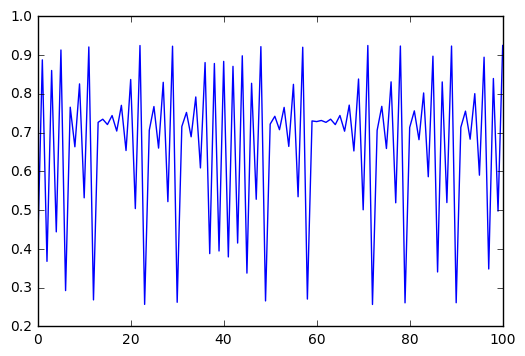

In [39]:
plt.plot(out)

But you can also control just about everything you want to about the plot

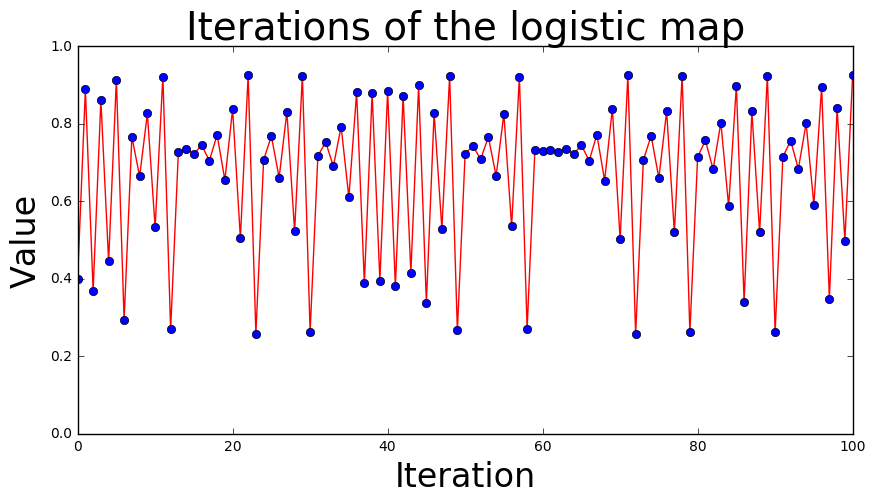

In [40]:
fig = plt.figure(figsize=(10, 5)) # Here we set up a figure window with a specific size
ax = fig.add_subplot(111) # Here we set up the axes, which we can then add to 
ax.plot(out,'r') # Here we add our plot as just a black line
ax.plot(out,'bo') # Here we add it again but as just blue circles
plt.xlim(0,100) # We can set the x-axes limits
plt.ylim(0,1) # And the y-axes limits

# We can set the various axes labels
plt.title('Iterations of the logistic map',fontsize=28)
plt.xlabel('Iteration',fontsize=24)
plt.ylabel('Value',fontsize=24)

# We can save the figure
fig.savefig('testplotCA.pdf')
# fig.savefig('test.eps') # This is a different type of format, encapsulated postscript

(The logistic map is a very interesting function in itself. You might want to try some different values of the multiplication factor and the initial condition and see how the plot above changes. But don't get too distracted!)

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>NS Model - Plotting road</b>
<br><br>
Making a nice plot of the `road` can be a bit tricky, so I'm going to show you a good way below. First though I'll set up a `road` array that might be the output of a simulation.
<br><br> 
</section>

In [41]:
# Suppose maximum vehicle velocity is given by
vmax=5

# Example road
road=np.array([[-1., -1., -1., -1., -1.,  3., -1.,  3.],
       [-1., -1., -1., -1.,  3., -1.,  1., -1.],
       [ 0.,  0., -1.,  3., -1., -1., -1., -1.],
       [ 0., -1.,  1., -1., -1.,  2., -1.,  2.],
       [-1.,  1., -1., -1.,  2., -1.,  1., -1.],
       [-1., -1., -1.,  2., -1.,  1., -1., -1.],
       [ 0., -1.,  2., -1., -1., -1., -1.,  2.],
       [-1.,  1., -1., -1.,  2., -1.,  2., -1.],
       [-1., -1., -1.,  2., -1., -1., -1., -1.],
       [-1., -1.,  2., -1., -1., -1., -1., -1.]])

<section style="color:#806000; background-color:#ffffdd">
<br>
We'll plot the `road` array using matplotlibs `imshow` function. A simple way to do it is
<br><br>
</section>

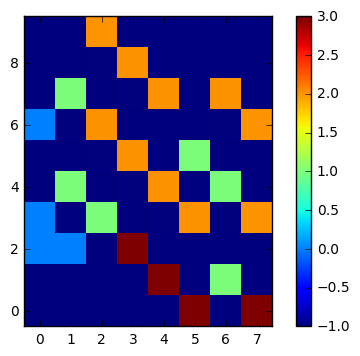

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
im=ax.imshow(road,interpolation='none',origin=0)
fig.colorbar(im)

<section style="color:#806000; background-color:#ffffdd">
<br>
However, we can make this plot a bit prettier (IMHO) as follows. We'll need some functions from matplotlib:
<br><br>
</section>

In [43]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

<section style="color:#806000; background-color:#ffffdd">
<br>
I'm also going to define some variables that make a custom colormap and colorbar.
<br><br>
</section>

In [44]:
# This creates a 3 by vmax+1 matrix to store rgb colors, which includes white 
# and then colors ranging from blue to red
cs=np.array([1,0,0])
ce=np.array([0,0,1])
cmat=np.transpose(np.vstack(
        (np.linspace(cs[0],ce[0],num=vmax+1),
         np.linspace(cs[1],ce[1],num=vmax+1),
         np.linspace(cs[2],ce[2],num=vmax+1))))
cmap=mpl.colors.ListedColormap(cmat)
cmap.set_under((1., 1., 1.))

# These variables set the appearance of the colorbar
bounds=[-0.5+i for i in range(vmax+2)]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbticks=range(vmax+1)

<section style="color:#806000; background-color:#ffffdd">
<br>
Now we plot useing `imshow` again, but with a few bells and whistles.
<br><br>
</section>

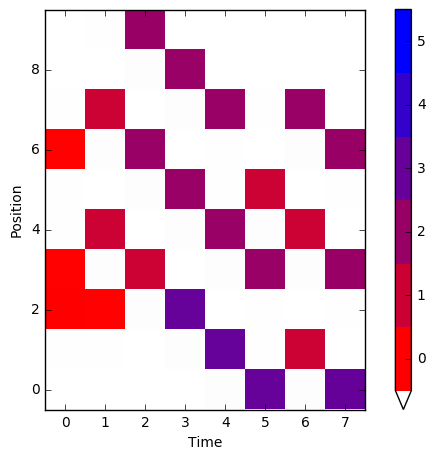

In [45]:
# Plotting the figure
fig = plt.figure(figsize=(11, 4))
ax = fig.add_axes([0,0,1,1])
im=ax.imshow(road,interpolation='none',origin=0,cmap=cmap,vmin=0,vmax=vmax+1)
plt.xlabel('Time')
plt.ylabel('Position')

# These commands make the colorbar size fit the axis
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
# Plot the colorbar
mpl.colorbar.ColorbarBase(cax,cmap=cmap,norm=norm,ticks=cbticks,extend='min',boundaries=[-1]+bounds)

<section style="color:#806000; background-color:#ffffdd">
<br>
Time runs from left to right and vehicles move upwards and right. Vehicles are shaded from red ($v=0$) to blue $(v=v_{\rm max})$. Empty lattice sites are white.
<br><br>
<b>NS Model - Plotting road</b>
<br><br>
You should now have code that runs the NS model. It's a good idea to verify that your code does what you think it should by printing out various variables at each time step and checking that what you think should happen does. This will be easier if $L$ and $T$ are small.
<br><br>
Once you've verified that your code works as intended, it's time to play! Try increasing $L$ and $T$ (how big can you make them?), try varying the other parameters, particularly $N$ and $p$, you could change the initial condition, and so on... 
<br><br>
The next natural step is to use your code to produce a fundamental diagram. In order to do this, you need to work out the traffic density, average velocity and flow. How could you do this? How could you do this in a way that mimics how this is done by real inductance loops? 
<br><br>
To compute a fundamental diagram, you will need to run your program for different densities and compute the corresponding flow. A natural way to do this is to loop over your NS function, changing $N$ and using the output to determine the velocities/flows. You may have to wait while your computer does this (but I'd be surprised if you had to wait more than a few minutes).
<br><br>
How you use your program will depend on what you do as part of your project. Some guidance is included in the project description document.
<br><br>
</section>